# Agriculture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load train and test dataset
df_train = pd.read_csv("agriculture_train.csv")
df_test = pd.read_csv("agriculture_test.csv")

In [3]:
#check shape of the dataset
print("Train data:",df_train.shape)
print("Test data:",df_test.shape)

Train data: (4599, 10)
Test data: (1199, 9)


In [4]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
#check unique values present in each attributes.
df_train.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

In [6]:
#check datatypes and null values present in data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Null value present in Number_Weeks_Used attribue and need to fill this null value.

In [7]:
#fill null value of Number_Weeks_Used column with it's most frequent value.
df_train["Number_Weeks_Used"] = df_train["Number_Weeks_Used"].fillna(df_train["Number_Weeks_Used"].mode()[0])

In [8]:
#check null value
df_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [9]:
# Drop ID column because it is not useful for our model.
df_train.drop(["ID"],axis=1,inplace=True)
df_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


## Univariate Analysis

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

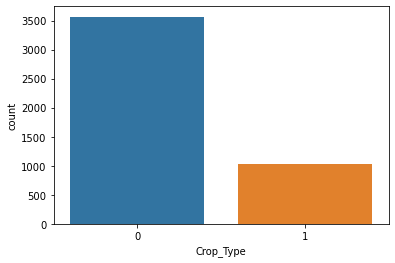

In [10]:
sns.countplot(df_train["Crop_Type"])

Crop type zero is more preferd by farmers compared to crop type one in our dataset. 

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

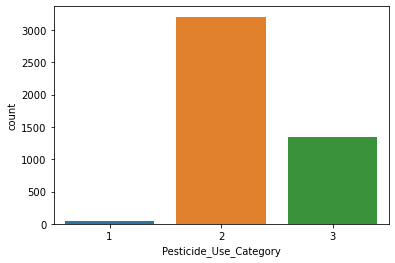

In [11]:
sns.countplot(df_train["Pesticide_Use_Category"])

Maximum farmers used Pesticide previously(category=2) for farming compared to another two categories.while, very few farmers never used pesticides(category=1). 

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='count'>

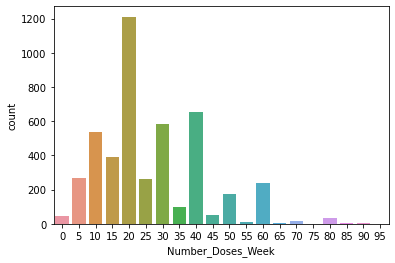

In [12]:
sns.countplot(df_train["Number_Doses_Week"])

Pesticides maximum number of doses per week is approx. 1200. 

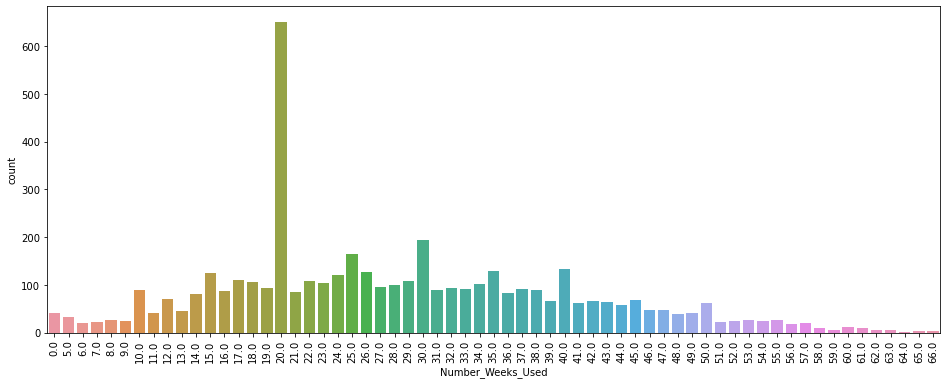

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(df_train["Number_Weeks_Used"])
plt.xticks(rotation="vertical")
plt.show()

Pesticides maximum use is around 650 weeks.

<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

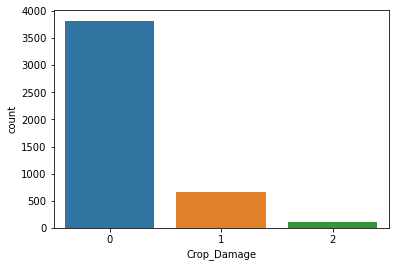

In [14]:
sns.countplot(df_train["Crop_Damage"])

1. Most of the crop is healthy and Crop is damage due to pesticide is very low in our dataset.(0=alive,1=Damage due to other reason,2=Damage due to pesticides)
2. Our target variable is crop damage. This distribution is imbalanced so, we use oversampling method in our model training in order to equally distribute crop damage data. 

## Bivariate Analysis

<AxesSubplot:xlabel='Crop_Type', ylabel='Estimated_Insects_Count'>

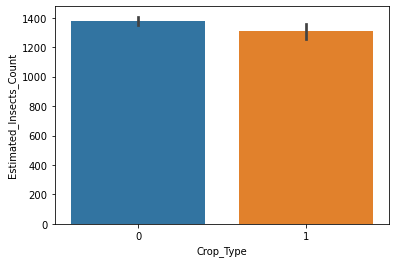

In [15]:
sns.barplot(x="Crop_Type",y="Estimated_Insects_Count",data=df_train)

Insects is almost equally present in both types of crop.

<AxesSubplot:xlabel='Soil_Type', ylabel='Estimated_Insects_Count'>

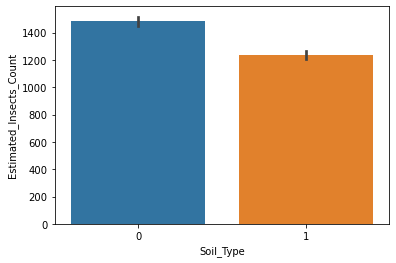

In [16]:
sns.barplot(x="Soil_Type",y="Estimated_Insects_Count",data=df_train)

Insects are slightly more present in zero type of soil.

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='Estimated_Insects_Count'>

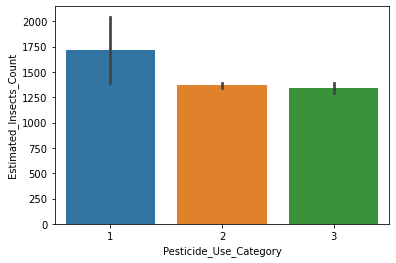

In [17]:
sns.barplot(x="Pesticide_Use_Category",y="Estimated_Insects_Count",data=df_train)

Insects count are more, where pesticieds is never used.while,insects count are equal where,pesticides is previously used and currently using.  

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='Estimated_Insects_Count'>

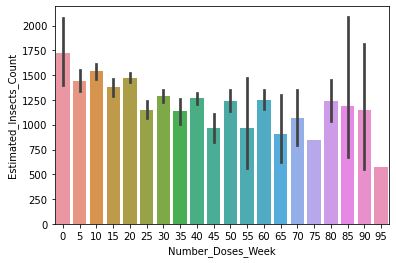

In [18]:
sns.barplot(x="Number_Doses_Week",y="Estimated_Insects_Count",data=df_train)

Insects count is high Where pesticides no. of doses per week is high. 

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

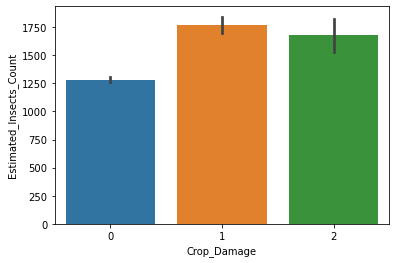

In [19]:
sns.barplot(x="Crop_Damage",y="Estimated_Insects_Count",data=df_train)

1. Insects count are less where,crops is healthy.
2. Insects count are high where,crop is damaged due to other reasons and damaged due to pesticides. 

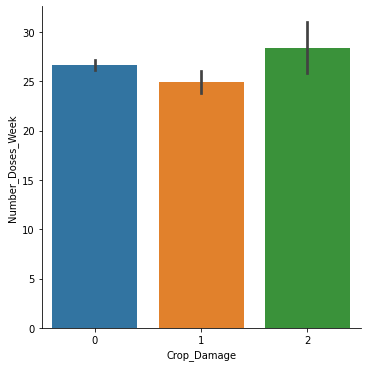

In [20]:
sns.factorplot(x="Crop_Damage",y="Number_Doses_Week",data=df_train,kind="bar")

Crop damage due to pesticides is high where number of doses per week is high.

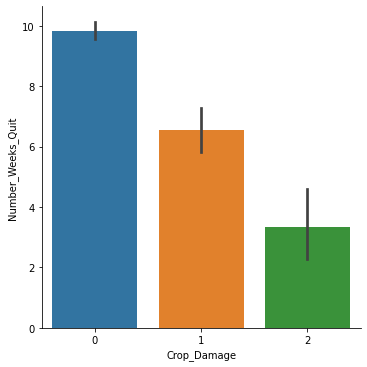

In [21]:
sns.factorplot(x="Crop_Damage",y="Number_Weeks_Quit",data=df_train,kind="bar")

Crop is healthy, where pesticides quits per week is high.

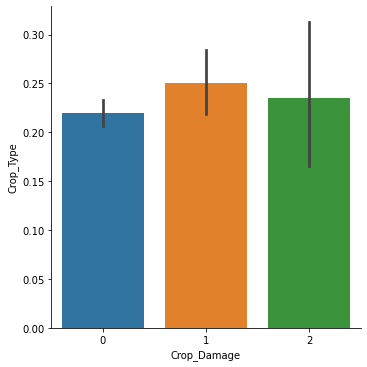

In [22]:
sns.factorplot(x="Crop_Damage",y="Crop_Type",data=df_train,kind="bar")

Crop damage due to other reasons is more prone to crop type 1.

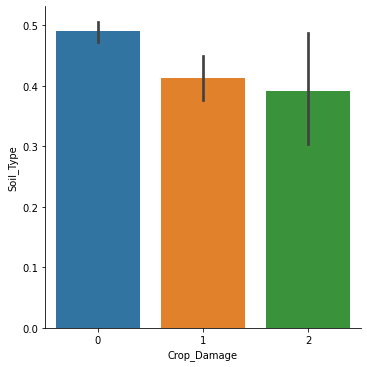

In [23]:
sns.factorplot(x="Crop_Damage",y="Soil_Type",data=df_train,kind="bar")

Healthy type of crop is more prone to soil type 1.

In [24]:
categorical_col = df_train.drop(["Estimated_Insects_Count","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit"],axis=1)
numeric_col = df_train.drop(["Crop_Type","Soil_Type","Pesticide_Use_Category","Season","Crop_Damage"],axis=1)
numeric_col.describe()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,26.477495,28.036530,9.205479
std,814.439120,15.524647,12.249436,9.713253
min,150.000000,0.000000,0.000000,0.000000
25%,731.000000,15.000000,20.000000,0.000000
50%,1212.000000,20.000000,26.000000,7.000000
75%,1786.000000,40.000000,36.000000,16.000000
max,4097.000000,95.000000,66.000000,47.000000


1. There is large difference between mean and standard deviation in every columns except Number_Weeks_Quit.It depicts that skewness is present in data and need to remove.
2. There is large difference between 75 percent of the data and maximum value of the data in every attributes.It represents that outliers present in data and need to remove.

## Handling Outliers

<AxesSubplot:xlabel='Estimated_Insects_Count'>

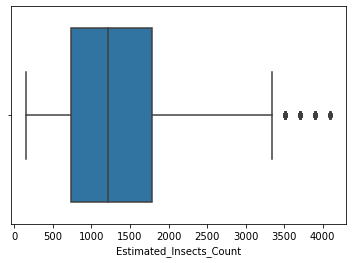

In [25]:
sns.boxplot(df_train["Estimated_Insects_Count"])

<AxesSubplot:xlabel='Number_Doses_Week'>

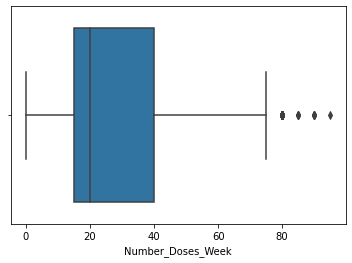

In [26]:
sns.boxplot(df_train["Number_Doses_Week"])

<AxesSubplot:xlabel='Number_Weeks_Used'>

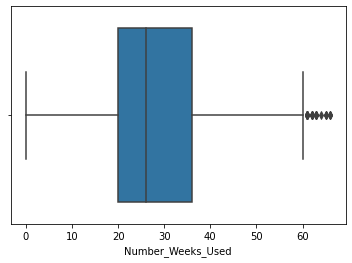

In [27]:
sns.boxplot(df_train["Number_Weeks_Used"])

<AxesSubplot:xlabel='Number_Weeks_Quit'>

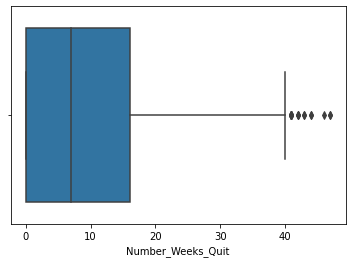

In [28]:
sns.boxplot(df_train["Number_Weeks_Quit"])

From the above plots we can see that outliers present in data and need to remove.

In [29]:
#check and remove outliers of numerical data using zscore
from scipy.stats import zscore
z = np.abs(zscore(numeric_col))
threshold=3
print(np.where(z>3))

(array([  22,   23,  100,  185,  252,  325,  346,  375,  384,  702,  703,
        704,  705,  706,  807,  855,  856,  911,  978,  998, 1017, 1019,
       1097, 1212, 1291, 1307, 1324, 1326, 1329, 1337, 1341, 1342, 1343,
       1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406, 1443, 1457, 1489,
       1523, 1589, 1652, 1654, 1868, 2019, 2090, 2136, 2140, 2165, 2174,
       2183, 2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2392, 2553,
       2565, 2589, 2590, 2591, 2615, 2702, 2714, 2779, 2928, 2929, 2940,
       2942, 2944, 2945, 3048, 3241, 3252, 3253, 3254, 3255, 3256, 3257,
       3336, 3388, 3526, 3682, 3718, 3766, 3830, 3840, 3841, 3856, 3894,
       3902, 3915, 3919, 3932, 3932, 3933, 3934, 3935, 3936, 3937, 3938,
       3939, 3940, 3940, 4024, 4186, 4213, 4274, 4375, 4376, 4436, 4516],
      dtype=int64), array([0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1

In [30]:
df_train_1 = numeric_col[(z<3).all(axis=1)]
df_train_1

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,188,0,0.0,0
1,209,0,0.0,0
2,257,0,0.0,0
3,257,0,0.0,0
4,342,0,0.0,0
...,...,...,...,...
4594,2138,20,20.0,1
4595,2139,30,47.0,2
4596,2267,10,7.0,27
4597,2267,10,20.0,24


In [31]:
#check loss of outliers data 
percentage_loss = ((4599-4482)/4599)*100
percentage_loss

2.5440313111545985

## Prepare data for model training

In [32]:
#remove rows from categorical data which is removed from numerical data
categorical_col_1 = categorical_col.drop([22,   23,  100,  185,  252,  325,  346,  375,  384,  702,  703,
        704,  705,  706,  807,  855,  856,  911,  978,  998, 1017, 1019,
       1097, 1212, 1291, 1307, 1324, 1326, 1329, 1337, 1341, 1342, 1343,
       1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406, 1443, 1457, 1489,
       1523, 1589, 1652, 1654, 1868, 2019, 2090, 2136, 2140, 2165, 2174,
       2183, 2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2392, 2553,
       2565, 2589, 2590, 2591, 2615, 2702, 2714, 2779, 2928, 2929, 2940,
       2942, 2944, 2945, 3048, 3241, 3252, 3253, 3254, 3255, 3256, 3257,
       3336, 3388, 3526, 3682, 3718, 3766, 3830, 3840, 3841, 3856, 3894,
       3902, 3915, 3919, 3932, 3932, 3933, 3934, 3935, 3936, 3937, 3938,
       3939, 3940, 3940, 4024, 4186, 4213, 4274, 4375, 4376, 4436, 4516],axis=0)

In [33]:
#merge numerical and categorical data
df_train_new = pd.concat([df_train_1,categorical_col_1],axis=1)

In [34]:
df_train_new.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage
0,188,0,0.0,0,1,0,1,1,0
1,209,0,0.0,0,1,0,1,2,1
2,257,0,0.0,0,1,0,1,2,1
3,257,0,0.0,0,1,1,1,2,1
4,342,0,0.0,0,1,0,1,2,1


In [35]:
#our target variable is crop damage so, we take our target variable as y and it is classification problem.
x = df_train_new.drop(["Crop_Damage"],axis=1)
y = df_train_new["Crop_Damage"]

In [36]:
print(x.shape)
print(y.shape)

(4482, 8)
(4482,)


In [37]:
# Here,we use oversampling technique because of imbalanced classification of our target variable.
# Oversampling technique generate new samples of the minority classes.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros,y_ros = ros.fit_resample(x,y)

In [38]:
print(x_ros.shape)
print(y_ros.shape)

(11193, 8)
(11193,)


## Handling Skewness

<AxesSubplot:xlabel='Estimated_Insects_Count', ylabel='Density'>

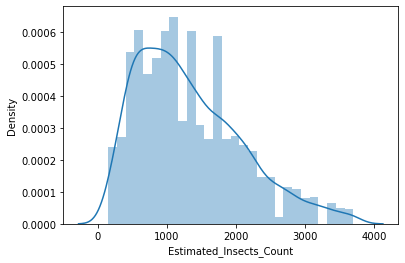

In [39]:
sns.distplot(df_train_new["Estimated_Insects_Count"])

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='Density'>

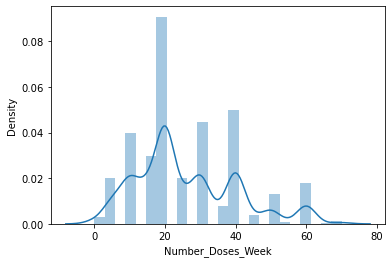

In [40]:
sns.distplot(df_train_new["Number_Doses_Week"])

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Density'>

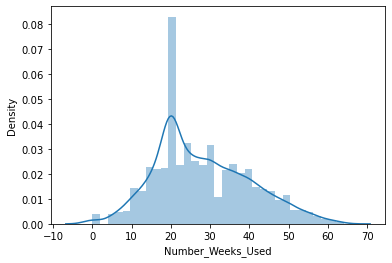

In [41]:
sns.distplot(df_train_new["Number_Weeks_Used"])

<AxesSubplot:xlabel='Number_Weeks_Quit', ylabel='Density'>

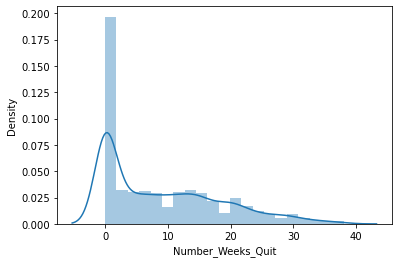

In [42]:
sns.distplot(df_train_new["Number_Weeks_Quit"])

From the above distribution plots we can see that skewness present in data and need to remove. 

In [43]:
#remove skewness by power transform method
from sklearn.preprocessing import power_transform
x_ros = power_transform(x_ros,method='yeo-johnson')

## Scaling data

In [44]:
#scaling data with mean=0 and unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x_ros)

In [45]:
#split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_t,y_ros,test_size=0.20,random_state=42)

## Find Best Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy score:",accuracy_score(y_test,predm)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("**************************************************************")
    print("\n")

Accuracy of LogisticRegression() is:
Accuracy of training model is: 0.5217779763234308
Accuracy score: 52.389459580169714
Confusion matrix: 
 [[524 136 132]
 [172 237 307]
 [163 156 412]]
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.66      0.63       792
           1       0.45      0.33      0.38       716
           2       0.48      0.56      0.52       731

    accuracy                           0.52      2239
   macro avg       0.51      0.52      0.51      2239
weighted avg       0.52      0.52      0.52      2239

**************************************************************


Accuracy of DecisionTreeClassifier() is:
Accuracy of training model is: 0.9974313156131338
Accuracy score: 93.1219294327825
Confusion matrix: 
 [[641 128  23]
 [  3 713   0]
 [  0   0 731]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       792
           1     

## Bagging and Boosting methods

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

model = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(),ExtraTreesClassifier(),CatBoostClassifier()]

for i in model:
    i.fit(x_train,y_train)
    train = i.score(x_train,y_train)
    predi = i.predict(x_test)
    print("Accuracy of",i,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy score:",accuracy_score(y_test,predi)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predi))
    print("Classification report:","\n",classification_report(y_test,predi))
    print("**************************************************************")
    print("\n")

Accuracy of RandomForestClassifier() is:
Accuracy of training model is: 0.9974313156131338
Accuracy score: 96.33765073693613
Confusion matrix: 
 [[711  70  11]
 [  1 715   0]
 [  0   0 731]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       792
           1       0.91      1.00      0.95       716
           2       0.99      1.00      0.99       731

    accuracy                           0.96      2239
   macro avg       0.96      0.97      0.96      2239
weighted avg       0.97      0.96      0.96      2239

**************************************************************


Accuracy of AdaBoostClassifier() is:
Accuracy of training model is: 0.5503685503685504
Accuracy score: 56.00714604734256
Confusion matrix: 
 [[550 128 114]
 [200 242 274]
 [ 95 174 462]]
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.69      0.67       792
           1     

102:	learn: 0.6365672	total: 854ms	remaining: 7.43s
103:	learn: 0.6346774	total: 862ms	remaining: 7.43s
104:	learn: 0.6332640	total: 870ms	remaining: 7.42s
105:	learn: 0.6304405	total: 878ms	remaining: 7.41s
106:	learn: 0.6281909	total: 885ms	remaining: 7.39s
107:	learn: 0.6261666	total: 892ms	remaining: 7.36s
108:	learn: 0.6237435	total: 898ms	remaining: 7.34s
109:	learn: 0.6219856	total: 905ms	remaining: 7.32s
110:	learn: 0.6211670	total: 912ms	remaining: 7.3s
111:	learn: 0.6203655	total: 918ms	remaining: 7.28s
112:	learn: 0.6194235	total: 924ms	remaining: 7.25s
113:	learn: 0.6187080	total: 931ms	remaining: 7.24s
114:	learn: 0.6177498	total: 938ms	remaining: 7.21s
115:	learn: 0.6161945	total: 945ms	remaining: 7.2s
116:	learn: 0.6150924	total: 951ms	remaining: 7.18s
117:	learn: 0.6138234	total: 958ms	remaining: 7.16s
118:	learn: 0.6123493	total: 964ms	remaining: 7.14s
119:	learn: 0.6113679	total: 971ms	remaining: 7.12s
120:	learn: 0.6086313	total: 978ms	remaining: 7.11s
121:	learn: 0.

276:	learn: 0.4481338	total: 2.07s	remaining: 5.42s
277:	learn: 0.4472723	total: 2.08s	remaining: 5.41s
278:	learn: 0.4463096	total: 2.09s	remaining: 5.4s
279:	learn: 0.4453548	total: 2.1s	remaining: 5.39s
280:	learn: 0.4450435	total: 2.1s	remaining: 5.39s
281:	learn: 0.4443217	total: 2.11s	remaining: 5.38s
282:	learn: 0.4440511	total: 2.12s	remaining: 5.36s
283:	learn: 0.4434601	total: 2.12s	remaining: 5.35s
284:	learn: 0.4425821	total: 2.13s	remaining: 5.34s
285:	learn: 0.4410839	total: 2.14s	remaining: 5.34s
286:	learn: 0.4396971	total: 2.14s	remaining: 5.33s
287:	learn: 0.4394934	total: 2.15s	remaining: 5.32s
288:	learn: 0.4392606	total: 2.16s	remaining: 5.31s
289:	learn: 0.4387975	total: 2.16s	remaining: 5.29s
290:	learn: 0.4378198	total: 2.17s	remaining: 5.29s
291:	learn: 0.4369515	total: 2.18s	remaining: 5.28s
292:	learn: 0.4365109	total: 2.18s	remaining: 5.26s
293:	learn: 0.4350980	total: 2.19s	remaining: 5.26s
294:	learn: 0.4344241	total: 2.19s	remaining: 5.25s
295:	learn: 0.4

441:	learn: 0.3523043	total: 3.47s	remaining: 4.38s
442:	learn: 0.3517485	total: 3.48s	remaining: 4.38s
443:	learn: 0.3511687	total: 3.49s	remaining: 4.37s
444:	learn: 0.3508247	total: 3.5s	remaining: 4.36s
445:	learn: 0.3504964	total: 3.51s	remaining: 4.36s
446:	learn: 0.3503105	total: 3.52s	remaining: 4.35s
447:	learn: 0.3501355	total: 3.52s	remaining: 4.34s
448:	learn: 0.3499103	total: 3.53s	remaining: 4.33s
449:	learn: 0.3496602	total: 3.54s	remaining: 4.33s
450:	learn: 0.3492170	total: 3.55s	remaining: 4.32s
451:	learn: 0.3488513	total: 3.56s	remaining: 4.31s
452:	learn: 0.3481145	total: 3.56s	remaining: 4.3s
453:	learn: 0.3477310	total: 3.57s	remaining: 4.3s
454:	learn: 0.3475753	total: 3.58s	remaining: 4.29s
455:	learn: 0.3468496	total: 3.59s	remaining: 4.28s
456:	learn: 0.3464818	total: 3.6s	remaining: 4.27s
457:	learn: 0.3459111	total: 3.6s	remaining: 4.26s
458:	learn: 0.3452265	total: 3.61s	remaining: 4.26s
459:	learn: 0.3445848	total: 3.62s	remaining: 4.25s
460:	learn: 0.344

610:	learn: 0.2903549	total: 4.87s	remaining: 3.1s
611:	learn: 0.2901606	total: 4.88s	remaining: 3.1s
612:	learn: 0.2897591	total: 4.89s	remaining: 3.09s
613:	learn: 0.2895393	total: 4.9s	remaining: 3.08s
614:	learn: 0.2892703	total: 4.91s	remaining: 3.07s
615:	learn: 0.2890765	total: 4.92s	remaining: 3.06s
616:	learn: 0.2886677	total: 4.92s	remaining: 3.06s
617:	learn: 0.2884583	total: 4.93s	remaining: 3.05s
618:	learn: 0.2882460	total: 4.95s	remaining: 3.05s
619:	learn: 0.2876454	total: 4.96s	remaining: 3.04s
620:	learn: 0.2875051	total: 4.97s	remaining: 3.03s
621:	learn: 0.2874015	total: 4.97s	remaining: 3.02s
622:	learn: 0.2870771	total: 4.98s	remaining: 3.02s
623:	learn: 0.2869169	total: 4.99s	remaining: 3.01s
624:	learn: 0.2864737	total: 5s	remaining: 3s
625:	learn: 0.2863903	total: 5.01s	remaining: 2.99s
626:	learn: 0.2860870	total: 5.02s	remaining: 2.98s
627:	learn: 0.2857175	total: 5.02s	remaining: 2.98s
628:	learn: 0.2851692	total: 5.03s	remaining: 2.97s
629:	learn: 0.2846071

781:	learn: 0.2460415	total: 6.26s	remaining: 1.74s
782:	learn: 0.2458991	total: 6.27s	remaining: 1.74s
783:	learn: 0.2457766	total: 6.28s	remaining: 1.73s
784:	learn: 0.2454605	total: 6.28s	remaining: 1.72s
785:	learn: 0.2452275	total: 6.29s	remaining: 1.71s
786:	learn: 0.2450055	total: 6.3s	remaining: 1.7s
787:	learn: 0.2446704	total: 6.3s	remaining: 1.7s
788:	learn: 0.2443870	total: 6.31s	remaining: 1.69s
789:	learn: 0.2442786	total: 6.32s	remaining: 1.68s
790:	learn: 0.2440155	total: 6.33s	remaining: 1.67s
791:	learn: 0.2437405	total: 6.34s	remaining: 1.67s
792:	learn: 0.2436628	total: 6.35s	remaining: 1.66s
793:	learn: 0.2434887	total: 6.36s	remaining: 1.65s
794:	learn: 0.2431504	total: 6.37s	remaining: 1.64s
795:	learn: 0.2430617	total: 6.38s	remaining: 1.63s
796:	learn: 0.2426837	total: 6.39s	remaining: 1.63s
797:	learn: 0.2424745	total: 6.39s	remaining: 1.62s
798:	learn: 0.2422366	total: 6.4s	remaining: 1.61s
799:	learn: 0.2421545	total: 6.41s	remaining: 1.6s
800:	learn: 0.2420

962:	learn: 0.2112275	total: 7.65s	remaining: 294ms
963:	learn: 0.2111049	total: 7.67s	remaining: 286ms
964:	learn: 0.2109509	total: 7.67s	remaining: 278ms
965:	learn: 0.2108533	total: 7.68s	remaining: 270ms
966:	learn: 0.2107905	total: 7.69s	remaining: 262ms
967:	learn: 0.2105751	total: 7.69s	remaining: 254ms
968:	learn: 0.2104885	total: 7.7s	remaining: 246ms
969:	learn: 0.2103131	total: 7.71s	remaining: 238ms
970:	learn: 0.2101594	total: 7.71s	remaining: 230ms
971:	learn: 0.2099350	total: 7.72s	remaining: 222ms
972:	learn: 0.2097310	total: 7.73s	remaining: 214ms
973:	learn: 0.2096865	total: 7.73s	remaining: 206ms
974:	learn: 0.2094119	total: 7.74s	remaining: 198ms
975:	learn: 0.2093472	total: 7.75s	remaining: 191ms
976:	learn: 0.2091345	total: 7.75s	remaining: 183ms
977:	learn: 0.2090480	total: 7.76s	remaining: 175ms
978:	learn: 0.2088962	total: 7.77s	remaining: 167ms
979:	learn: 0.2087308	total: 7.77s	remaining: 159ms
980:	learn: 0.2086441	total: 7.78s	remaining: 151ms
981:	learn: 0

## Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4],'random_state':list(range(0,15)),'ccp_alpha':[0.0,0.1,0.2]}
clf = GridSearchCV(dtc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 4, 'random_state': 0}


In [49]:
dtc = DecisionTreeClassifier(ccp_alpha=0.0,criterion='gini',max_depth=4,random_state=0)
dtc.fit(x_train,y_train)
train = dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy score:",accuracy_score(y_test,preddtc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,preddtc))
print("Classification report:","\n",classification_report(y_test,preddtc))

Accuracy of training model is: 0.5627652445834264
Accuracy score: 57.07905314872711
Confusion matrix: 
 [[577  92 123]
 [221 193 302]
 [155  68 508]]
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.73      0.66       792
           1       0.55      0.27      0.36       716
           2       0.54      0.69      0.61       731

    accuracy                           0.57      2239
   macro avg       0.57      0.56      0.54      2239
weighted avg       0.57      0.57      0.55      2239



In [50]:
knc = KNeighborsClassifier()
parameters = {'n_neighbors':[4,5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf = GridSearchCV(knc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [51]:
knc = KNeighborsClassifier(algorithm='auto',n_neighbors=4,weights='distance')
knc.fit(x_train,y_train)
train = knc.score(x_train,y_train)
predknc = knc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy score:",accuracy_score(y_test,predknc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predknc))
print("Classification report:","\n",classification_report(y_test,predknc))

Accuracy of training model is: 0.9974313156131338
Accuracy score: 90.5761500669942
Confusion matrix: 
 [[582 179  31]
 [  1 715   0]
 [  0   0 731]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85       792
           1       0.80      1.00      0.89       716
           2       0.96      1.00      0.98       731

    accuracy                           0.91      2239
   macro avg       0.92      0.91      0.90      2239
weighted avg       0.92      0.91      0.90      2239



In [52]:
rfc = RandomForestClassifier()
parameters = {'n_estimators':[50,100,120],'criterion':['gini','entropy'],'max_depth':[2,3,4],'random_state':list(range(0,10))}
clf = GridSearchCV(rfc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 120, 'random_state': 6}


In [54]:
rfc = RandomForestClassifier(criterion='gini',max_depth=4,n_estimators=120,random_state=6)
rfc.fit(x_train,y_train)
train = rfc.score(x_train,y_train)
predrfc = rfc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy score:",accuracy_score(y_test,predrfc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predrfc))
print("Classification report:","\n",classification_report(y_test,predrfc))

Accuracy of training model is: 0.6048693321420594
Accuracy score: 60.74140241179098
Confusion matrix: 
 [[584 110  98]
 [216 217 283]
 [136  36 559]]
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.74      0.68       792
           1       0.60      0.30      0.40       716
           2       0.59      0.76      0.67       731

    accuracy                           0.61      2239
   macro avg       0.61      0.60      0.58      2239
weighted avg       0.61      0.61      0.59      2239



In [53]:
xg = XGBClassifier()
parameters = {'n_estimators':[50,100,120],'learning_rate':[0.01,0.1,0.2],'gamma':[0.01,0.1],'booster':['gbtree','gblinear','dart']}
clf = GridSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

[23:53:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[23:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[23:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[23:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[23:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[23:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[23:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [55]:
xg = XGBClassifier(booster='gbtree',gamma=0.1,learning_rate=0.2,n_estimators=120)
xg.fit(x_train,y_train)
train = xg.score(x_train,y_train)
predxg = xg.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy score:",accuracy_score(y_test,predxg)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predxg))
print("Classification report:","\n",classification_report(y_test,predxg))

[00:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of training model is: 0.9621398257761894
Accuracy score: 92.00535953550693
Confusion matrix: 
 [[636 131  25]
 [ 18 693   5]
 [  0   0 731]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       792
           1       0.84      0.97      0.90       716
           2       0.96      1.00      0.98       731

    accuracy                           0.92      2239
   macro avg       0.92      0.92      0.92      2239
weighted avg       0.93      0.92      0.92      2239



In [56]:
#check best model accuracy using cross validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(ExtraTreesClassifier(),x_t,y_ros,cv=10)
print(accuracy)
print("Accuracy of the model is:",accuracy.mean()*100)

[0.88392857 0.97232143 0.96696429 0.99106345 0.95710456 0.86237712
 0.90080429 0.98033959 0.96782842 0.98480786]
Accuracy of the model is: 94.67539576152177


we get best training and test accuacy using ExtraTreesClassifier.

In [57]:
#best model
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
train = etc.score(x_train,y_train)
predetc = etc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy score:",accuracy_score(y_test,predetc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predetc))
print("Classification report:","\n",classification_report(y_test,predetc))

Accuracy of training model is: 0.9974313156131338
Accuracy score: 97.40955783832068
Confusion matrix: 
 [[735  52   5]
 [  1 715   0]
 [  0   0 731]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       792
           1       0.93      1.00      0.96       716
           2       0.99      1.00      1.00       731

    accuracy                           0.97      2239
   macro avg       0.97      0.98      0.97      2239
weighted avg       0.98      0.97      0.97      2239



In [58]:
#save best result
df1 = pd.DataFrame(predetc)
df1.to_csv("etc_agriculture.csv")
#save best model
import joblib
joblib.dump(etc,"etc_agriculture.obj")

['etc_agriculture.obj']

## check test data result

In [59]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [60]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [61]:
df_test["Number_Weeks_Used"] = df_test["Number_Weeks_Used"].fillna(df_test["Number_Weeks_Used"].mode()[0])

In [62]:
df_test.drop(["ID"],axis=1,inplace=True)

In [63]:
categorical_col = df_test.drop(["Estimated_Insects_Count","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit"],axis=1)
numeric_col = df_test.drop(["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"],axis=1)

In [64]:
from scipy.stats import zscore
z = np.abs(zscore(numeric_col))
threshold=3
print(np.where(z>3))

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030, 1152], dtype=int64), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64))


In [65]:
df_test_1 = numeric_col[(z<3).all(axis=1)]
df_test_1

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,188,0,20.0,0
1,410,0,0.0,0
2,626,0,0.0,0
3,731,0,0.0,0
4,789,0,0.0,0
...,...,...,...,...
1194,1132,40,34.0,7
1195,1132,40,25.0,3
1196,1132,20,13.0,23
1197,1212,10,35.0,5


In [66]:
percentage_loss = ((1199-1160)/1199)*100
percentage_loss

3.252710592160134

In [67]:
categorical_col_1 = categorical_col.drop([50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030, 1152],axis=0)

In [68]:
df_test_new = pd.concat([df_test_1,categorical_col_1],axis=1)

In [70]:
#remove skewness by power transform method
from sklearn.preprocessing import power_transform
x_test_data = power_transform(df_test_new,method='yeo-johnson')

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_test = sc.fit_transform(x_test_data)

In [72]:
predetc = etc.predict(x_test)

In [73]:
print(preddtc)

[0 0 0 ... 1 1 2]


In [74]:
#Save test data result
df2 = pd.DataFrame(predetc)
df2.to_csv("etc_test_agriculture.csv")